In [1]:
%matplotlib inline

import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

import mne
from mne import io
from mne.time_frequency import tfr_morlet, psd_multitaper
from mne.connectivity import spectral_connectivity       #ICAなど必要なもののimport
import csv

In [2]:
data_path = '/Users/emi/Desktop/media_TBS/mod_tv/'
cname = 'male'
sname = '03_tv_mod'
hname =  '.set'
fname = data_path + cname + sname + hname  #file nameを作る、という意味
fname     

'/Users/emi/Desktop/media_TBS/mod_tv/male03_tv_mod.set'

In [3]:
mon = mne.channels.read_montage(kind = 'standard_1020') 

In [5]:
#03
fname03 = data_path + cname + sname + hname

events03 = mne.io.read_events_eeglab('/Users/emi/Desktop/media_TBS/mod_tv/male03_tv_mod.set')
            
aw03 = mne.io.read_epochs_eeglab(fname03,montage=mon,
                               eog=('EOG1', 'EOG2'),
                               events=events03,
                               event_id = {'TV1':1, 'TV2':2, 'TV3':3, 'TV4':4, 'TV5':5, 'TV6':6, 'TV7':7, 'TV8':8, 'TV9':9, 'TV10':10, 'TV11':11, 'TV12':12, 'TV13':13, 'TV14':14, 'TV15':15, 'TV16':16, 'TV17':17, 'TV18':18, 'TV19':19, 'TV20':20, 'TV21':21,'TV22':22, 'TV23':23, 'TV24':24, 'TV25':25})
aw03.set_channel_types({'EOG1': 'eog', 'EOG2': 'eog'}) # Set Channel Type(それぞれを区別、名前をつける)
aw03.set_eeg_reference('average',projection=True)

picks03 = mne.pick_types(aw03.info, meg=False, eeg=True, eog=False, stim=False)  #読み込むチャンネルを設定

Extracting parameters from /Users/emi/Desktop/media_TBS/mod_tv/male03_tv_mod.set...


/Users/emi/.pyenv/versions/anaconda2-4.2.0/lib/python2.7/site-packages/mne/utils.py:876: DeprecationWarning: Function read_events_eeglab is deprecated; read_events_eeglab is deprecated from 0.17 and will be removed in 0.18. Please use read_annotations and create events using events_from_annotations.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-5-0ffc9d1235b6>:9: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EOG1', u'EOG2']. Their position has been left untouched.
  event_id = {'TV1':1, 'TV2':2, 'TV3':3, 'TV4':4, 'TV5':5, 'TV6':6, 'TV7':7, 'TV8':8, 'TV9':9, 'TV10':10, 'TV11':11, 'TV12':12, 'TV13':13, 'TV14':14, 'TV15':15, 'TV16':16, 'TV17':17, 'TV18':18, 'TV19':19, 'TV20':20, 'TV21':21,'TV22':22, 'TV23':23, 'TV24':24, 'TV25':25})


25 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


25 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


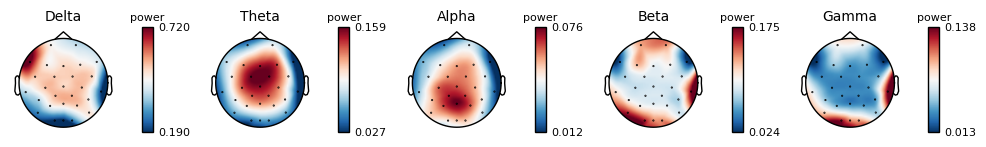

In [6]:
aw = mne.concatenate_epochs([aw03])

fig = aw.plot_psd_topomap(ch_type='eeg', normalize=True) #normalizeで決まった周波数帯で出てくる、topomapが顔の図